In [212]:
import scipy
import numpy as np
import librosa
import matplotlib.pyplot as plt

In [202]:
y, sr = librosa.load("noisy2_SNRdb_0.0_clnsp2.wav", sr=16000)

In [203]:
print(y)
print(len(y))
print(sr)

[-0.02587891 -0.03823853 -0.0423584  ...  0.14263916  0.0944519
 -0.01278687]
81318
16000


In [204]:
# The STFTM used in all our systems is computed based on a 32 ms Hamming window with 75% overlap between frames and a 512-point discrete Fourier transform
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.stft.html
f, t, zxx = scipy.signal.stft(y, fs=16000, window='hamm', nperseg=512, noverlap=0.75)
print(len(f), len(t), len(zxx))
# 257 696 257

257 160 257


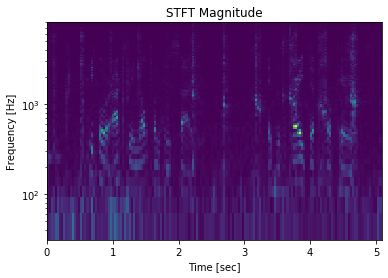

In [205]:
plt.figure()
plt.pcolormesh(t, f, np.abs(zxx), vmin=0)
plt.ylim([f[1], f[-1]])
plt.title('STFT Magnitude')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.yscale('log')
plt.show()

In [206]:
zxx_mean = np.mean(zxx, axis = 0)
zxx_std = np.std(zxx)

In [207]:
zxx_norm = (zxx-zxx_mean) / zxx_std

In [208]:
_, xrec = scipy.signal.istft(zxx_norm, fs=16000, window='hamm', nperseg=512, noverlap=0.75)

In [209]:
from IPython.display import Audio
audio = Audio(data=xrec, rate=16000)
audio

In [213]:
data_dir = "./Noise_training/"